<a href="https://colab.research.google.com/github/HmbGow/F360/blob/master/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# importing the libraries
import pandas as pd
import numpy as np
# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
# for creating validation set
from sklearn.model_selection import train_test_split
# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm
# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [8]:
# loading dataset
train = pd.read_csv('/content/sample_data/train/Training.csv')
test = pd.read_csv('/content/sample_data/Test/Test.csv')

train.head()

,id,label
0,0,10
1,1,10
2,2,10
3,3,11
4,4,11


In [9]:
# loading training images
train_img = []
for img_name in tqdm(train['id']):
    # defining the image path
    image_path = '/content/sample_data/train/' + str(img_name) + '.bmp'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)
# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['label'].values
train_x.shape

100%|██████████| 104/104 [00:14<00:00,  7.20it/s]


(104, 2048, 3072)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb571266400>,
 <matplotlib.image.AxesImage at 0x7fb5711c7ba8>)

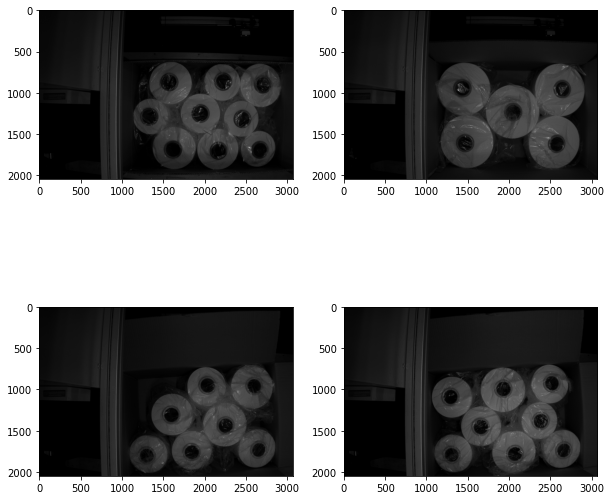

In [10]:
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')
